In [8]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn import tree
from sklearn.tree import export_text

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

x = df.loc[:, features]
y= df.loc[:, 'price'].values

In [5]:
x_train , x_test, y_train, y_test = train_test_split(x, y, random_state =0)

In [9]:
#random Forest

reg = RandomForestRegressor(n_estimators =100, random_state =0)

In [10]:
 reg.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [11]:
reg.predict(x_test.iloc[0].values.reshape(1, -1))
reg.predict(x_test[0:10])

array([ 354008.56,  999809.  ,  443760.25,  426332.  ,  760570.2 ,
        408775.5 ,  360030.14,  714794.4 ,  585902.14, 1665779.  ])

In [12]:
scr = reg.score(x_test, y_test)
print(scr)

0.577684658845681


In [14]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

x_train, x_test, y_train ,y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [15]:
btc = BaggingClassifier(n_estimators =100, random_state = 1)
btc.fit(x_train , y_train)

rfc = RandomForestClassifier(n_estimators =100, random_state = 1)
rfc.fit(x_train , y_train)

RandomForestClassifier(random_state=1)

[Text(992.0, 2174.4, 'petal length (cm) <= 2.5\ngini = 0.664\nsamples = 69\nvalue = [38, 33, 41]\nclass = virginica'),
 Text(744.0, 1691.2, 'gini = 0.0\nsamples = 22\nvalue = [38, 0, 0]\nclass = setosa'),
 Text(1240.0, 1691.2, 'petal length (cm) <= 4.95\ngini = 0.494\nsamples = 47\nvalue = [0, 33, 41]\nclass = virginica'),
 Text(496.0, 1208.0, 'petal width (cm) <= 1.6\ngini = 0.202\nsamples = 21\nvalue = [0, 31, 4]\nclass = versicolor'),
 Text(248.0, 724.8, 'gini = 0.0\nsamples = 18\nvalue = [0, 27, 0]\nclass = versicolor'),
 Text(744.0, 724.8, 'sepal width (cm) <= 3.1\ngini = 0.5\nsamples = 3\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(496.0, 241.5999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 4]\nclass = virginica'),
 Text(992.0, 241.5999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 4, 0]\nclass = versicolor'),
 Text(1984.0, 1208.0, 'petal length (cm) <= 5.05\ngini = 0.097\nsamples = 26\nvalue = [0, 2, 37]\nclass = virginica'),
 Text(1736.0, 724.8, 'sepal width (cm) <=

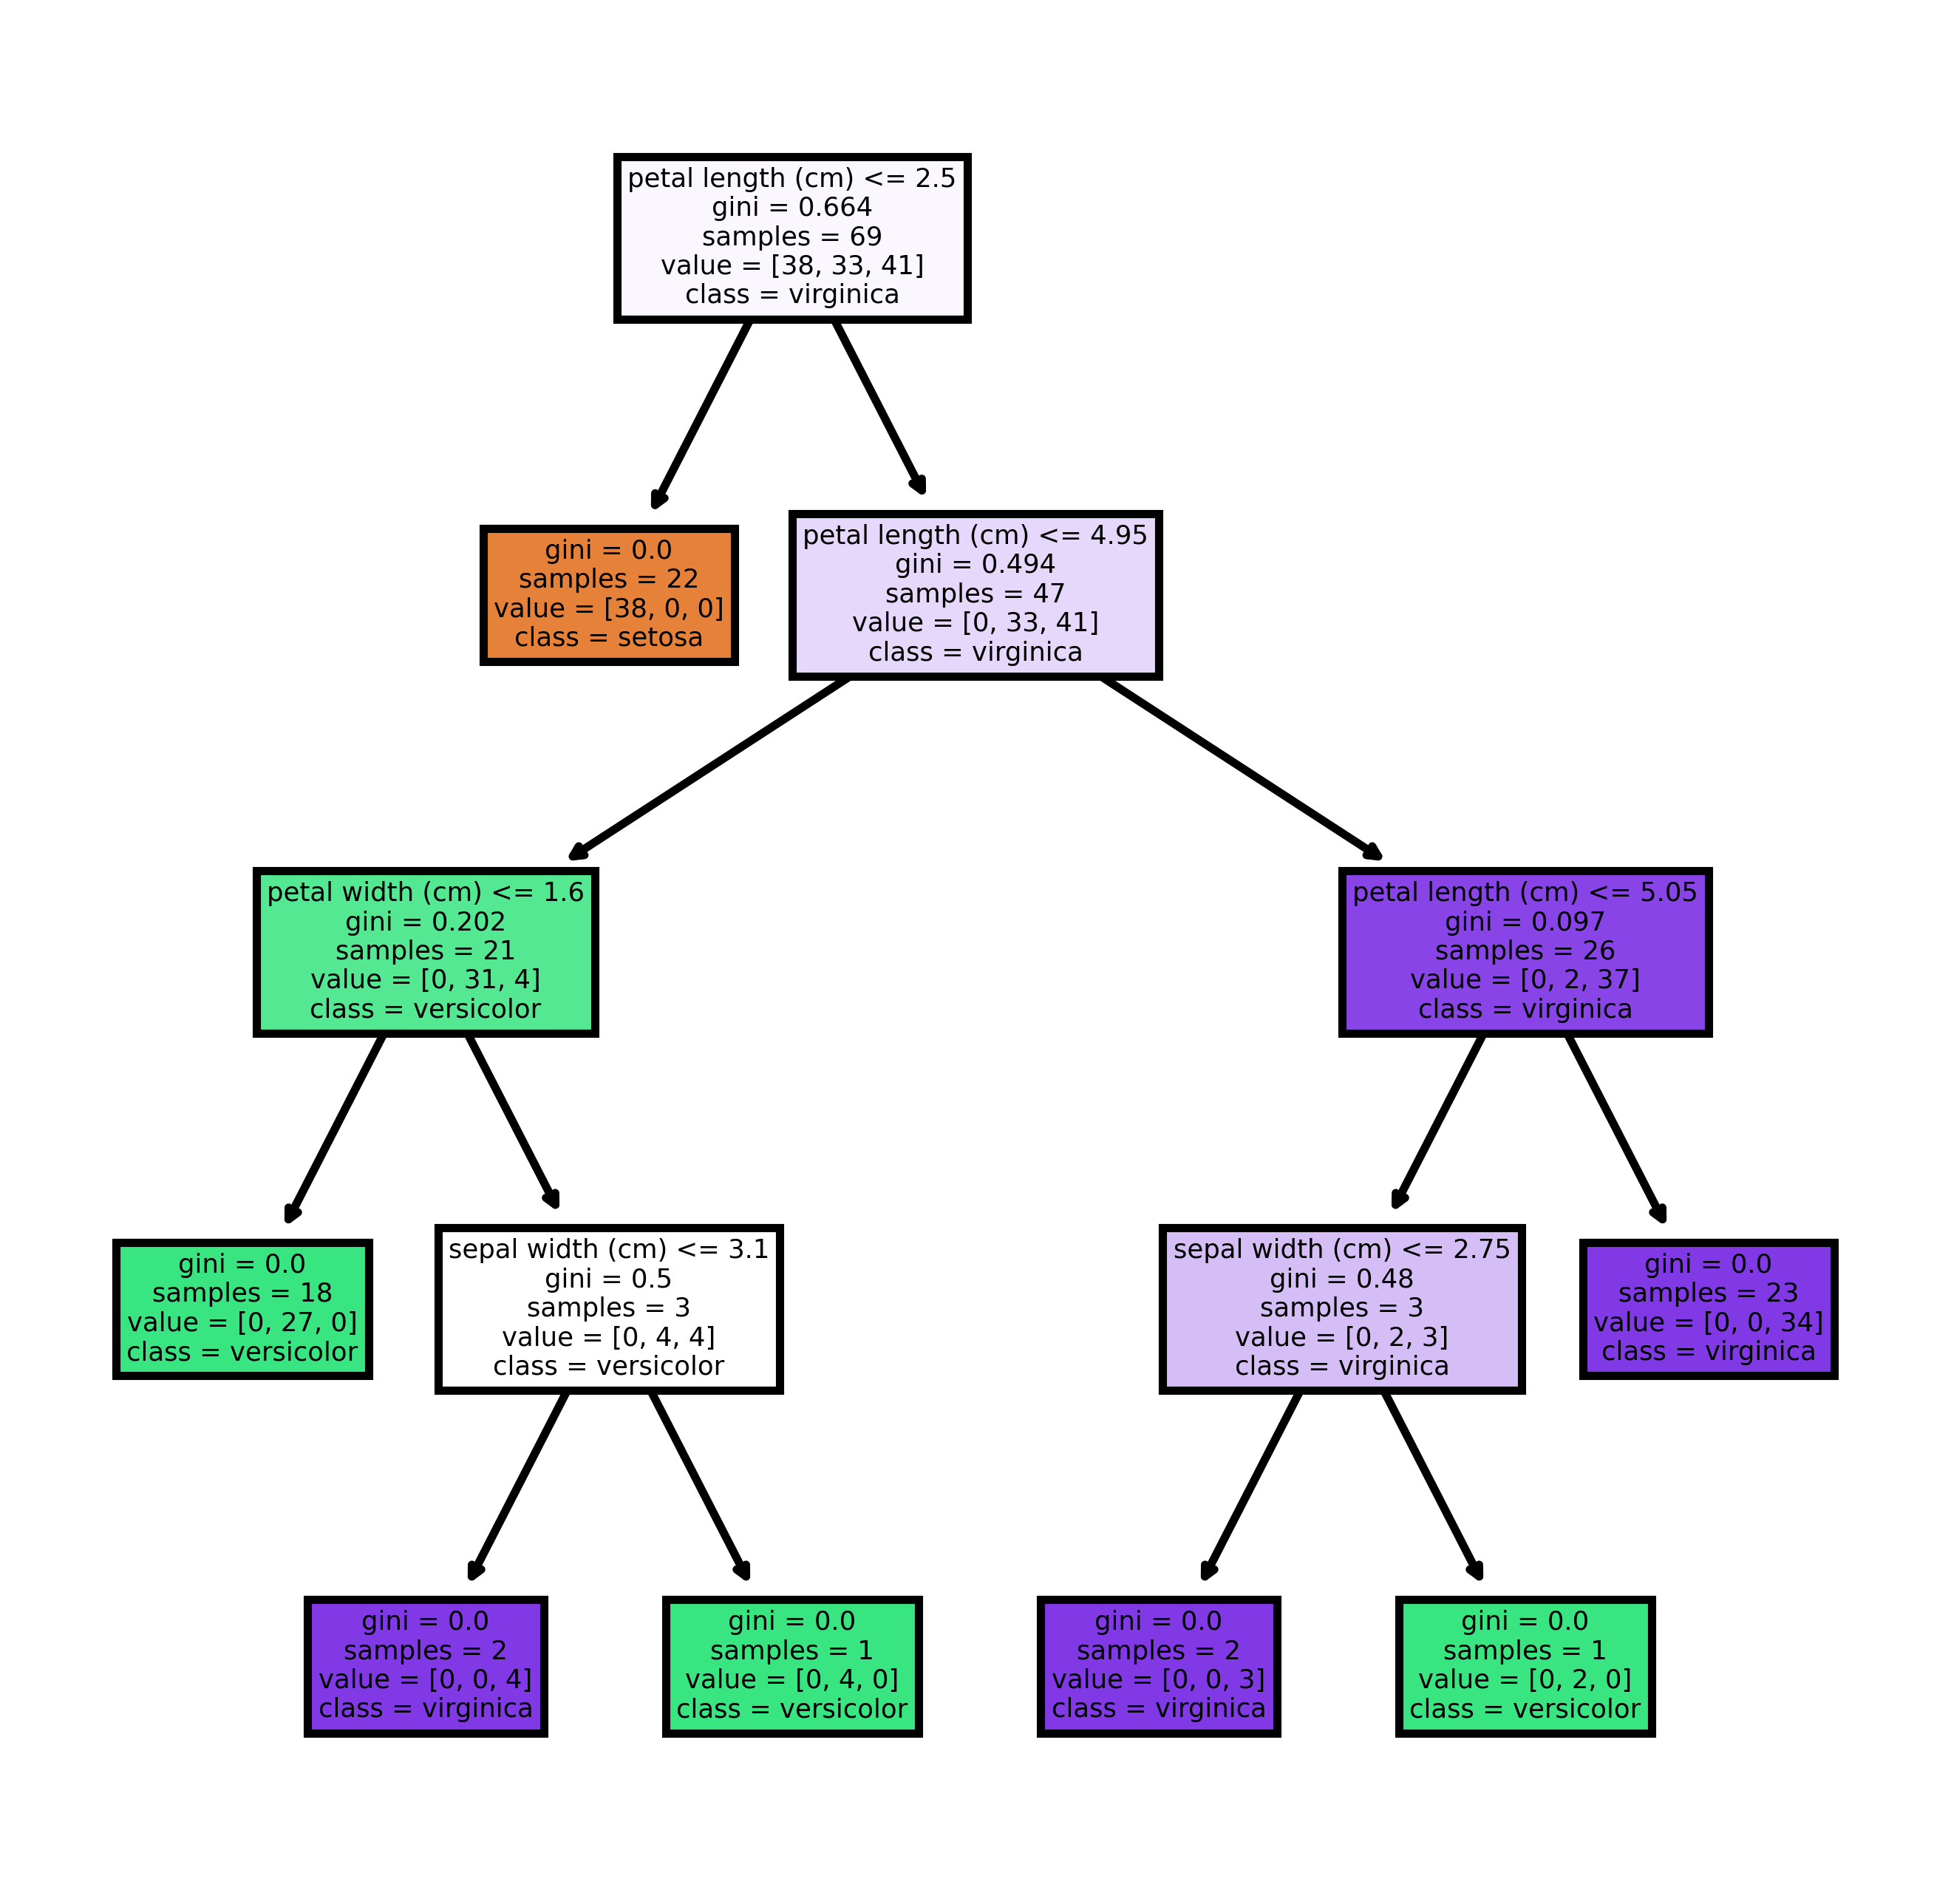

In [18]:
fig , axes = plt.subplots(nrows = 1, ncols = 1, figsize =(4,4), dpi=800)
tree.plot_tree(btc.estimators_[0],feature_names = data.feature_names, class_names = data.target_names, filled=True)

In [20]:
importances = pd.DataFrame({'feature':x_train.columns, 'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance', ascending = False)